In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import folium
from folium.plugins import HeatMap
from bokeh.palettes import brewer, Magma
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file

In [16]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [4]:
data.columns
data.Date = pd.to_datetime(data.Date)
data.Time = pd.to_datetime(data.Time)
data = data[data.Date.dt.year < 2018]
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
focusData = data[data.Category.isin(focuscrimes)]

In [5]:
focusData = focusData[['PdDistrict', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'X', 'Y']]
focusData.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)
focusData['latitude'] = focusData['latitude'].astype(float)
focusData['longitude'] = focusData['longitude'].astype(float)
focusData.head()

PdDistrict       Category               Descript DayOfWeek       Date  \
0  INGLESIDE        ROBBERY  ROBBERY, BODILY FORCE    Monday 2004-11-22   
1       PARK  VEHICLE THEFT      STOLEN AUTOMOBILE   Tuesday 2005-10-18   
2   SOUTHERN  VEHICLE THEFT      STOLEN AUTOMOBILE    Sunday 2004-02-15   
4   SOUTHERN        ASSAULT                BATTERY    Sunday 2010-11-21   
5    TARAVAL        ASSAULT                BATTERY   Tuesday 2013-04-02   

                 Time   longitude   latitude  
0 2023-03-22 17:50:00 -122.420084  37.708311  
1 2023-03-22 20:00:00 -120.500000  90.000000  
2 2023-03-22 02:00:00 -120.500000  90.000000  
4 2023-03-22 17:00:00 -122.410541  37.770913  
5 2023-03-22 15:50:00 -122.470366  37.745158

# What the hell happened to drugs?

It can be interesting to research why drug related crimes decreased so much

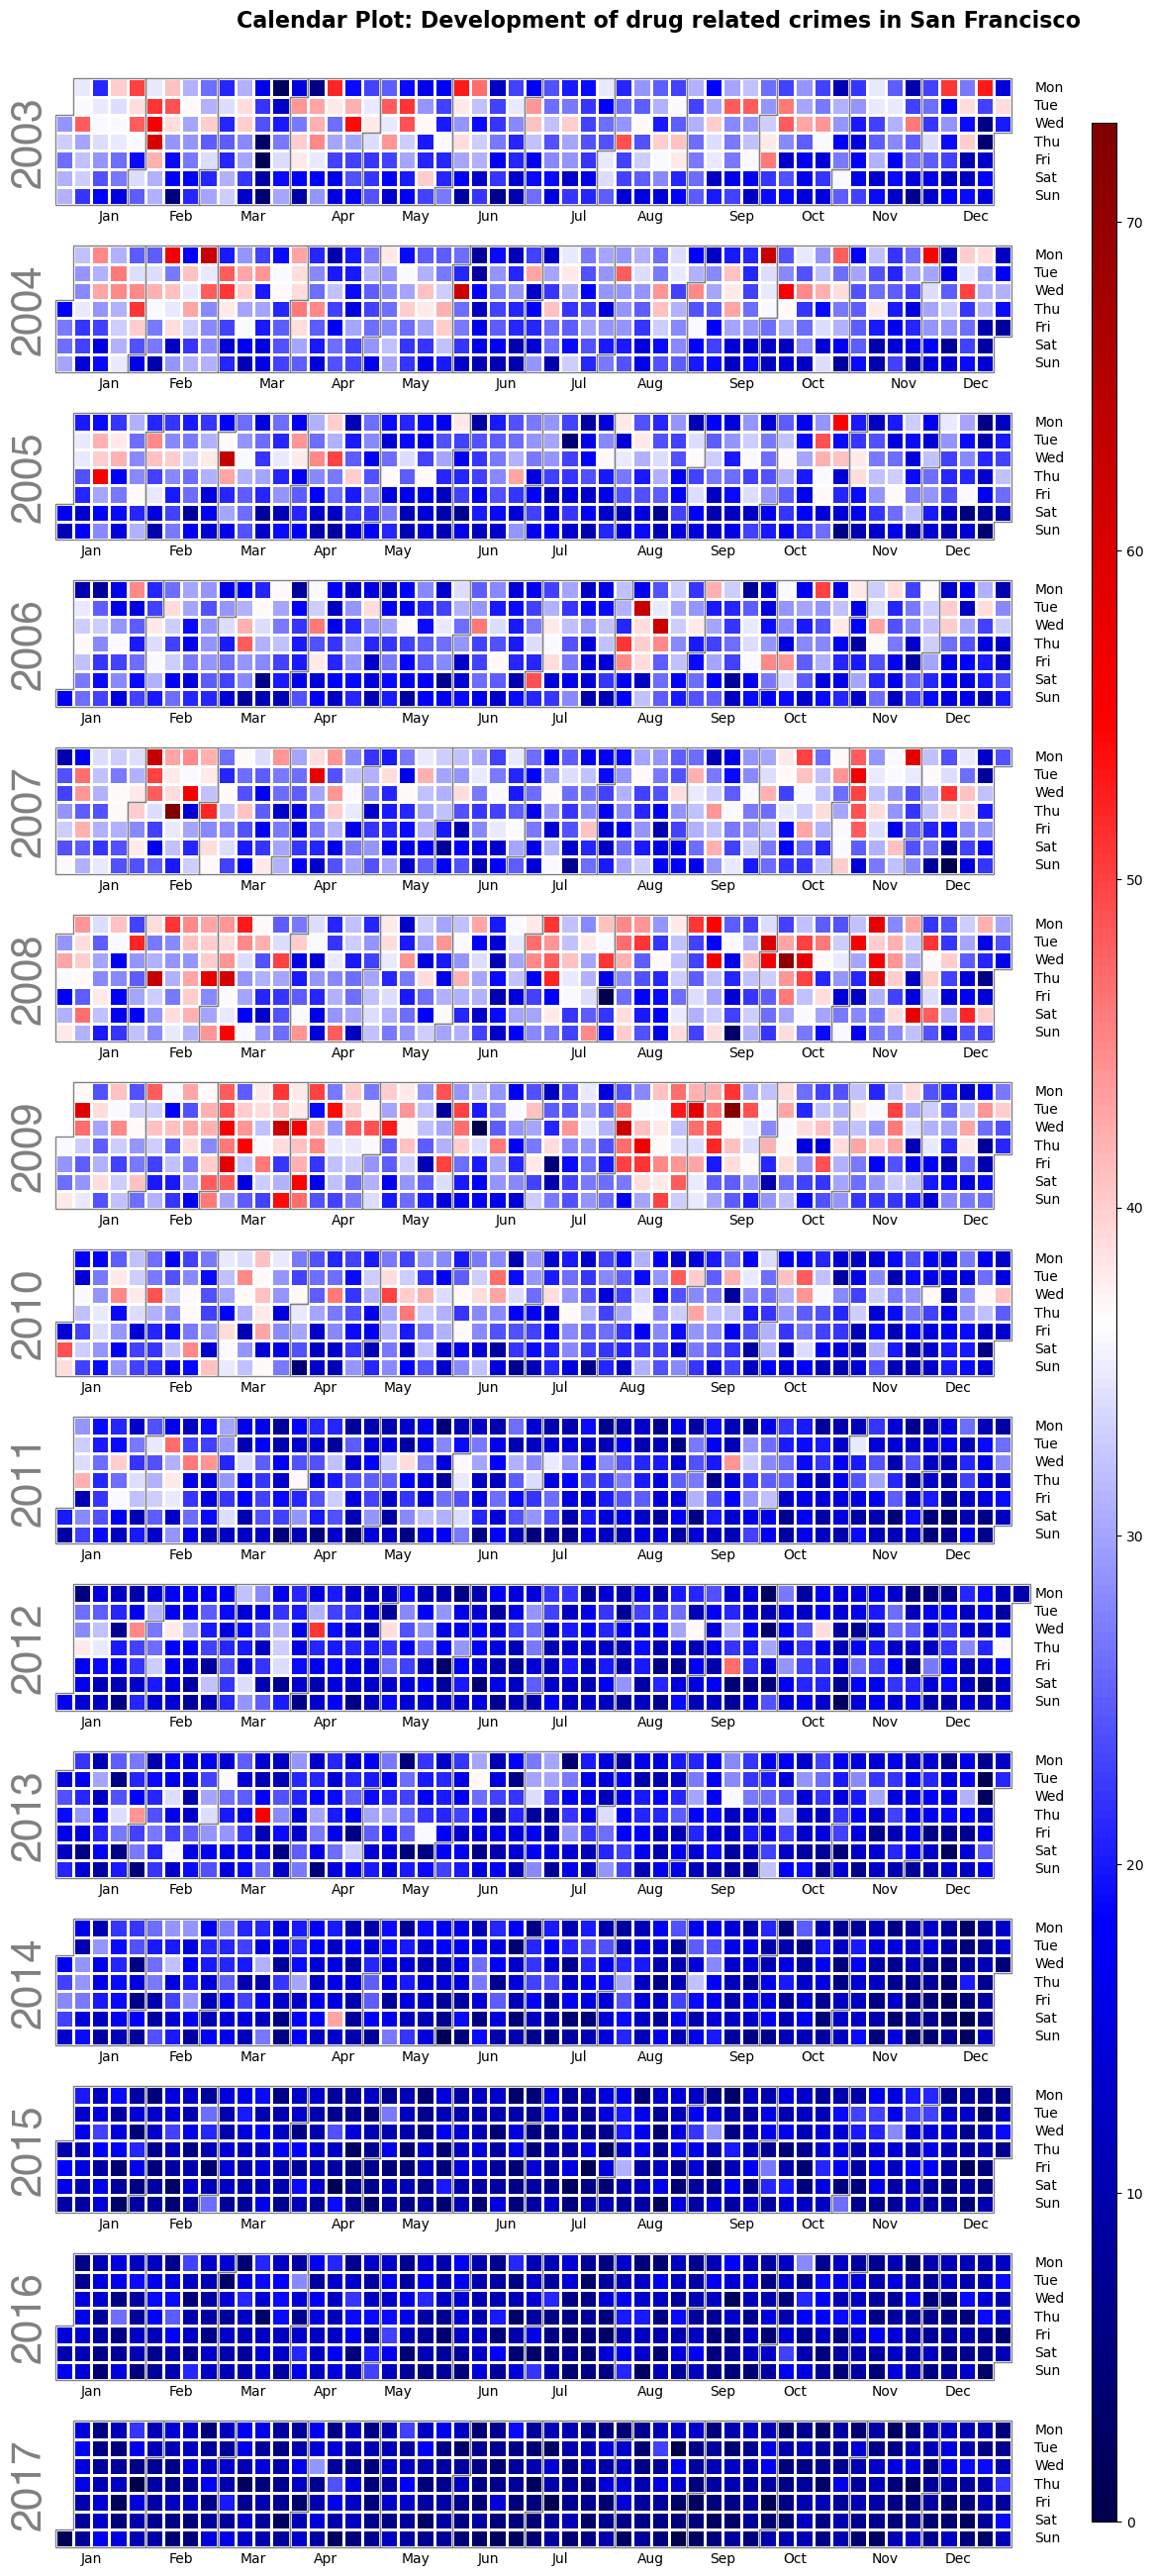

In [17]:
cal_title = 'Calendar Plot: Development of drug related crimes in San Francisco'

drugCalData = focusData[focusData['Category'] == 'DRUG/NARCOTIC']
drugCalData.set_index('Date', inplace=True)
calplot.calplot(drugCalData.Category, how='count', cmap='seismic', colorbar=True, suptitle = cal_title)
plt.suptitle(cal_title, weight="bold", fontsize=16, y=1.02)
plt.show()

# Heatmap on Drug related crimes

In [7]:
drugData = focusData[focusData['Category'] == 'DRUG/NARCOTIC']
drugData['Year'] = drugData['Date'].dt.year

/var/folders/bc/ynvgg9rn14v5sl_jcp8x8_s40000gn/T/ipykernel_22817/1209945053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugData['Year'] = drugData['Date'].dt.year


In [48]:
years = list(drugData.Year.unique())
years.sort()
heat_data = [[[row['latitude'],row['longitude']] for index, row in drugData[drugData['Date'].dt.year == i].iterrows()] for i in range(2003,2018)]
drugMap = folium.Map([37.7568, -122.4342], tiles = "Stamen Toner", zoom_start=13)
hm = folium.plugins.HeatMapWithTime(heat_data,auto_play=True, index = years, max_opacity=0.8, radius=16)
hm.add_to(drugMap)
drugMap

In [49]:
# export folium map as html
drugMap.save('drugMap.html')

# Bokeh visualization on Drug related crimes

In [10]:
districtData = drugData.groupby(['Year', 'PdDistrict']).size().unstack()

In [11]:
names = drugData['PdDistrict'].sort_values(ascending=False).unique()
names = names.tolist()
output_file('bokeh_assignment2.html')
names

['TENDERLOIN',
 'TARAVAL',
 'SOUTHERN',
 'RICHMOND',
 'PARK',
 'NORTHERN',
 'MISSION',
 'INGLESIDE',
 'CENTRAL',
 'BAYVIEW']

In [12]:
sortednames = ['TENDERLOIN',
 'SOUTHERN',
 'MISSION',
 'NORTHERN',
 'PARK',
 'BAYVIEW',
 'RICHMOND',
 'INGLESIDE',
 'CENTRAL',
 'TARAVAL']

In [13]:
title = 'Development of drug-related crimes over the years in San Francisco'
N = len(names)
p = figure(x_range=(2003, 2017), x_axis_label='Year', y_axis_label='Drug/narcotic crimes per district', title=title, plot_width=800, plot_height=400)
p.varea_stack(stackers=sortednames, x='Year', color=Magma[10], legend_label=sortednames, source=districtData, muted_alpha=0.5, muted=True)
p.legend.click_policy='mute'
p.legend.orientation = 'vertical'
p.add_layout(p.legend[0], 'left')
show(p)

# Articles talking about crime development in SF

- https://www.sfchronicle.com/bayarea/article/These-charts-show-how-drug-incidents-in-the-16723745.php

- https://towardsdatascience.com/san-franciscos-opioid-crisis-and-drug-problem-and-effects-on-public-safety-1ffad5040e0f 

- https://abc7news.com/sf-tenderloin-drug-arrests-narcan-homeless/11535735/ 